In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from tensorflow import keras
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import SimpleRNN, LSTM, Dropout, Flatten, Dense
import tensorflow as tf
from tensorflow.keras.models import Sequential

In [2]:
# This code imports the data you generated before for replicating.
stock_prices = pd.read_csv('stock_prices.csv')
arima_predictions_T = pd.read_csv('arima_predictions_T')
diff_T = stock_prices['T'].diff().dropna()
split = int(len(diff_T.values)*0.95)
diff_train_T = diff_T.iloc[:split]
diff_test_T = diff_T.iloc[split:]

In [3]:
n_steps = 10
n_features = 1

In [4]:
# This code is imported from the previous milestone for replicating.

def split_sequence(sequence, n_steps):
    X, y = [], []
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence) - 1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)




In [5]:
# This code is imported from the previous milestone for replicating.

X_diff_train_T, y_diff_train_T = split_sequence(diff_train_T, n_steps)
X_diff_train_T = X_diff_train_T.reshape((X_diff_train_T.shape[0],
                                         X_diff_train_T.shape[1], n_features))

X_diff_test_T, y_diff_test_T = split_sequence(diff_test_T.values, n_steps)
X_diff_test_T = X_diff_test_T.reshape((X_diff_test_T.shape[0],
                                       X_diff_test_T.shape[1], n_features))

In [6]:
# This code is imported from the previous milestone for replicating.

def RNN_part():
    model = Sequential()
    model.add(SimpleRNN(128,
              input_shape=(n_steps, n_features),
              return_sequences=True))
    model.add(Dropout(0.1))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(optimizer = 'adam' , loss='mean_squared_error', metrics=['mse'])
    return model

RNN_model = RNN_part()

In [7]:
RNN_model = RNN_part()
history_RNN = RNN_model.fit(X_diff_train_T, y_diff_train_T,
                            batch_size=200,
                            epochs=200,
                            validation_split=0.2)

Epoch 1/200
2/2 [==============================] - 1s 200ms/step - loss: 0.3841 - mse: 0.3841 - val_loss: 0.0959 - val_mse: 0.0959
Epoch 2/200
2/2 [==============================] - 0s 24ms/step - loss: 0.3277 - mse: 0.3277 - val_loss: 0.1154 - val_mse: 0.1154
Epoch 3/200
2/2 [==============================] - 0s 24ms/step - loss: 0.2887 - mse: 0.2887 - val_loss: 0.1022 - val_mse: 0.1022
Epoch 4/200
2/2 [==============================] - 0s 24ms/step - loss: 0.2782 - mse: 0.2782 - val_loss: 0.0842 - val_mse: 0.0842
Epoch 5/200
2/2 [==============================] - 0s 24ms/step - loss: 0.2373 - mse: 0.2373 - val_loss: 0.0724 - val_mse: 0.0724
Epoch 6/200
2/2 [==============================] - 0s 24ms/step - loss: 0.2236 - mse: 0.2236 - val_loss: 0.0633 - val_mse: 0.0633
Epoch 7/200
2/2 [==============================] - 0s 25ms/step - loss: 0.2073 - mse: 0.2073 - val_loss: 0.0584 - val_mse: 0.0584
Epoch 8/200
2/2 [==============================] - 0s 23ms/step - loss: 0.1852 - mse: 0.1

2/2 [==============================] - 0s 24ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 1.1296e-04 - val_mse: 1.1296e-04
Epoch 63/200
2/2 [==============================] - 0s 26ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 7.6415e-05 - val_mse: 7.6415e-05
Epoch 64/200
2/2 [==============================] - 0s 24ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 9.7878e-05 - val_mse: 9.7878e-05
Epoch 65/200
2/2 [==============================] - 0s 23ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 1.2435e-04 - val_mse: 1.2435e-04
Epoch 66/200
2/2 [==============================] - 0s 23ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 1.2576e-04 - val_mse: 1.2576e-04
Epoch 67/200
2/2 [==============================] - 0s 23ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 1.1879e-04 - val_mse: 1.1879e-04
Epoch 68/200
2/2 [==============================] - 0s 22ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 6.4974e-05 - val_mse: 6.4974e-05
Epoch 69/200
2/2 [======================

Epoch 121/200
2/2 [==============================] - 0s 24ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 1.6322e-04 - val_mse: 1.6322e-04
Epoch 122/200
2/2 [==============================] - 0s 25ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 1.4537e-04 - val_mse: 1.4537e-04
Epoch 123/200
2/2 [==============================] - 0s 22ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 4.8772e-05 - val_mse: 4.8772e-05
Epoch 124/200
2/2 [==============================] - 0s 23ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 6.1393e-05 - val_mse: 6.1393e-05
Epoch 125/200
2/2 [==============================] - 0s 23ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 1.0728e-04 - val_mse: 1.0728e-04
Epoch 126/200
2/2 [==============================] - 0s 24ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 9.5843e-05 - val_mse: 9.5843e-05
Epoch 127/200
2/2 [==============================] - 0s 23ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 1.0131e-04 - val_mse: 1.0131e-04
Epoch 128/200
2/2 [=

In [8]:
# This code is imported from the previous milestone for replicating.

start = X_diff_test_T[X_diff_test_T.shape[0]-1]
T_input = start
T_input = T_input.reshape((1, n_steps, n_features))

In [9]:
# This code is imported from the previous milestone for replicating.


predictions_T = []

for i in range(len(arima_predictions_T)):
    T_input = T_input.reshape((1, n_steps, n_features))
    yhat = RNN_model.predict(T_input, verbose=0)
    T_input = np.append(T_input, yhat)
    T_input = T_input[1:]
    predictions_T.append(yhat)

In [10]:
def rmse(y,yhat):
    return np.sqrt(mean_squared_error(y,yhat))

In [11]:
print('RMSE of AT&T for RNN model {:.4f}'\
      .format(rmse(diff_test_T, np.array(predictions_T).flatten())))

RMSE of AT&T for RNN model 0.4785


Well, the RMSE score of 0.3254, implying it outperforms the traditional time series models. We know that deep learning model works well with non-linear data. However, please also note that, it is not always the case that deep learning models is superior than the other time series model in terms of performance.

In [12]:
print(history_RNN.history.keys())

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


Let me plot the result of loss and test loss result. It turns out, after huge spike, test loss gets back on track and confirms that RNN performs well. 

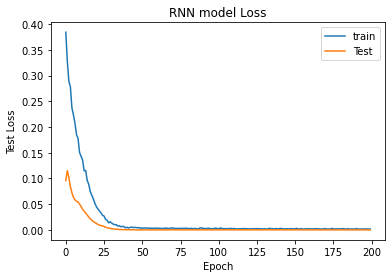

In [13]:
plt.plot(history_RNN.history['loss'])
plt.plot(history_RNN.history['val_loss'])
plt.title('RNN model Loss')
plt.ylabel('Test Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'Test'], loc='best')
plt.show()